In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon

%matplotlib inline

In [171]:
india_map = gdp.read_file('/mnt/70f9b7b9-1f7f-4a6d-8605-bc67936618d0/Downloads/India/India Shape/india_st.shp')

<AxesSubplot:>

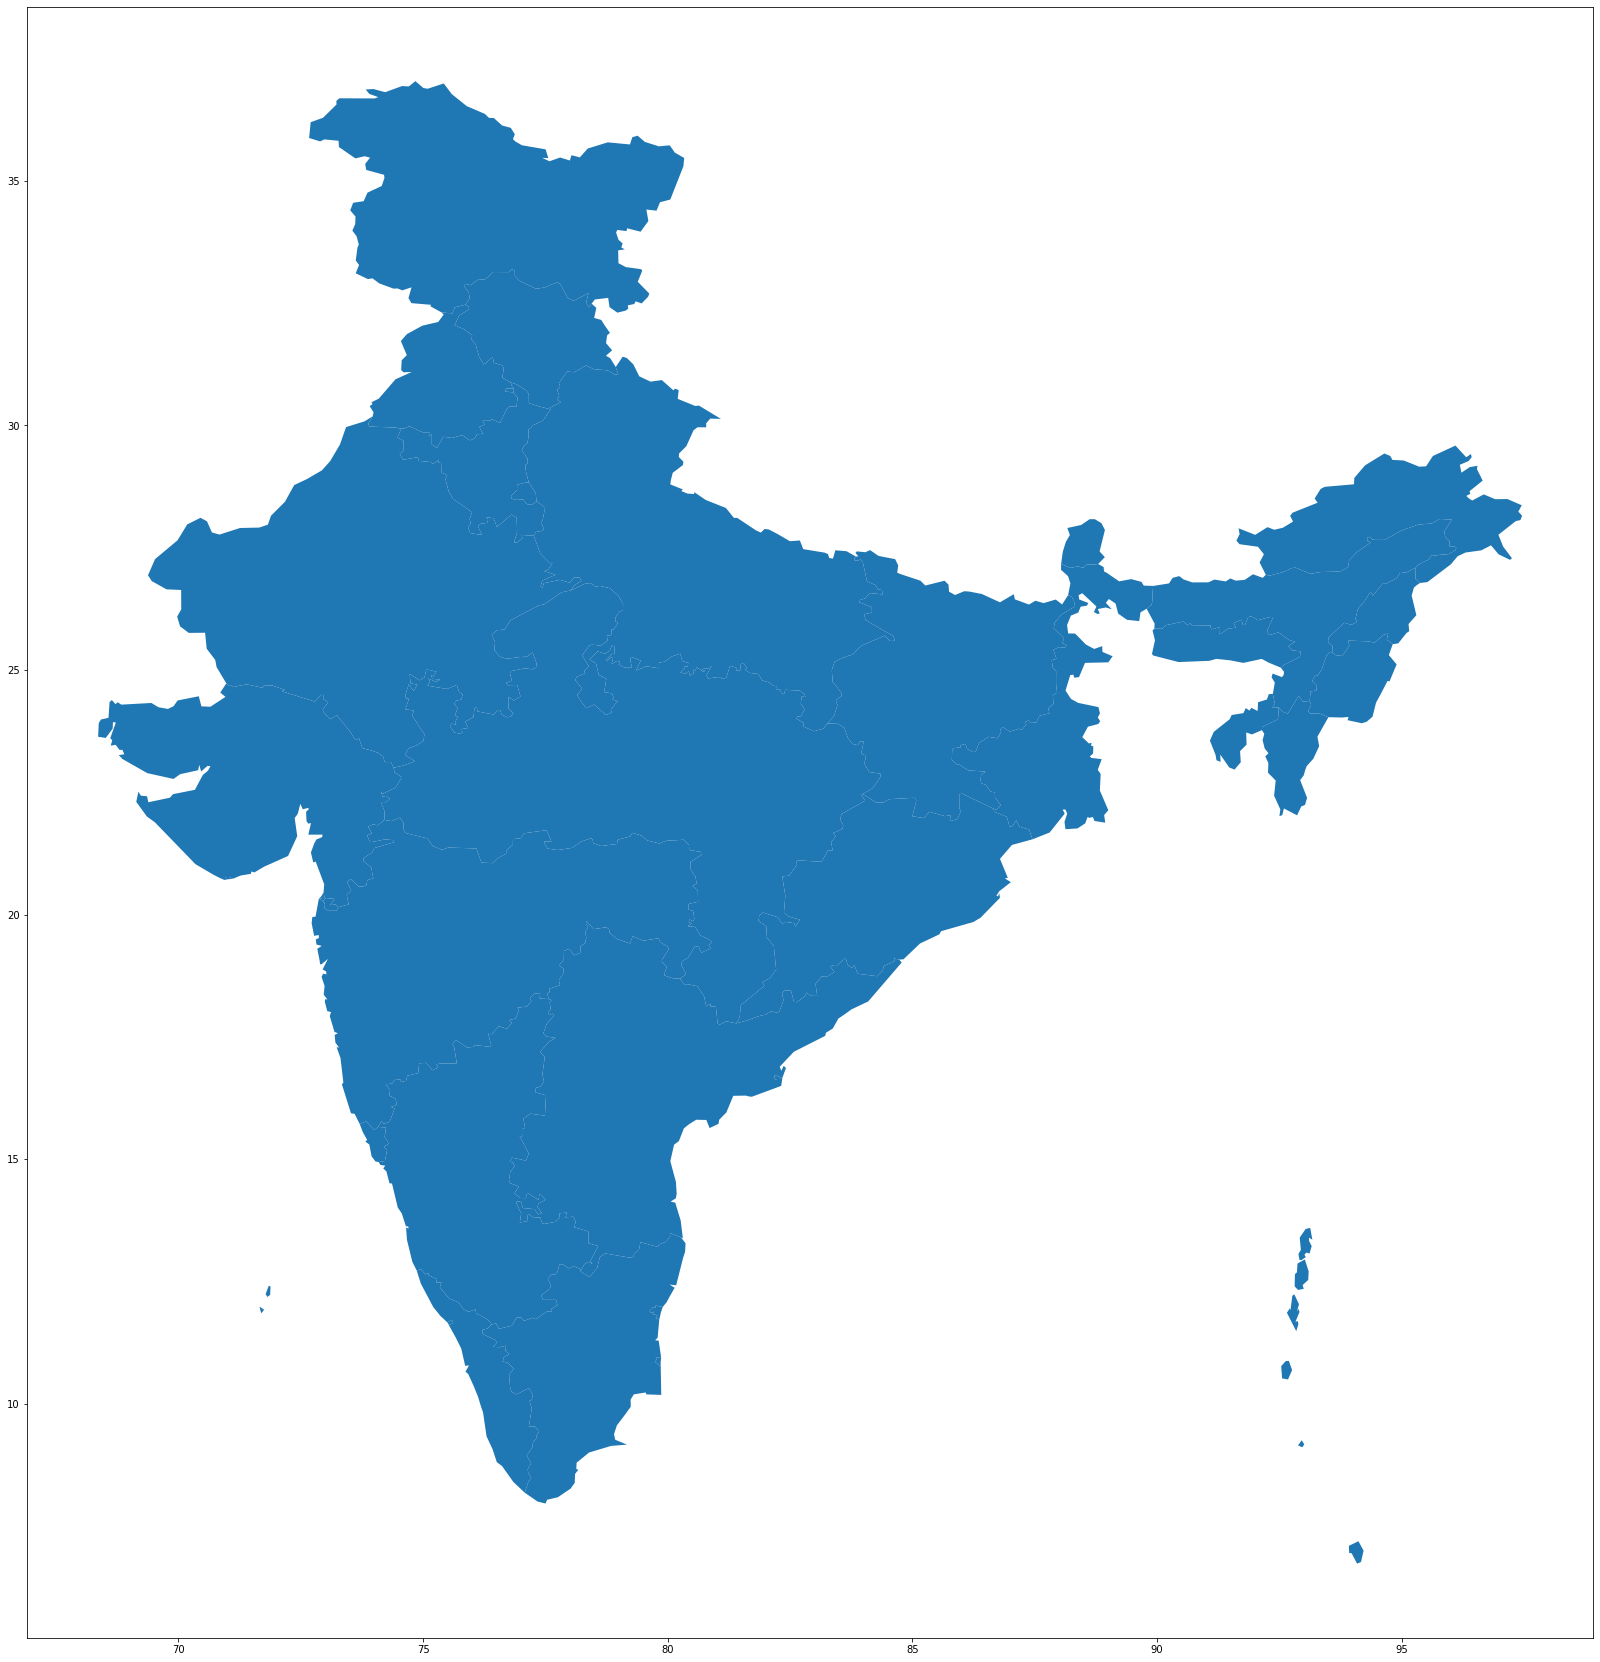

In [172]:
fig,ax = plt.subplots(figsize = (30,30))
india_map.plot(ax = ax)

In [173]:
df = pd.read_csv('/mnt/70f9b7b9-1f7f-4a6d-8605-bc67936618d0/Downloads/India/crops.csv')
crs = {'init': 'epsg:4326'}
df.head()

,State,SI,Place,Latitude,Longitude,Crop_id,Crop
0,Assam,1,Tezpur,26.680267,92.774472,1,Cassava
1,Assam,2,Gosaigaon,26.445940,89.975538,1,Cassava
2,Manipur,1,"Nungba, Tamenglong District",24.749616,93.420074,1,Cassava
3,Manipur,2,"Chiru, Chandel District",24.822511,93.935380,1,Cassava
4,Manipur,3,"Laimanai, Kakching District",24.462918,93.959651,1,Cassava


In [174]:
geometry = [Point(xy) for xy in zip( df["Longitude"], df["Latitude"])]

In [175]:
geometry[:3]

In [176]:
df.dtypes

State         object
SI             int64
Place         object
Latitude     float64
Longitude    float64
Crop_id        int64
Crop          object
dtype: object

In [177]:
#gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [178]:
#print(gdf.head())

In [179]:
geo_df = gdp.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

/home/bsl-ws2/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,State,SI,Place,Latitude,Longitude,Crop_id,Crop,geometry
0,Assam,1,Tezpur,26.680267,92.774472,1,Cassava,POINT (92.77447 26.68027)
1,Assam,2,Gosaigaon,26.445940,89.975538,1,Cassava,POINT (89.97554 26.44594)
2,Manipur,1,"Nungba, Tamenglong District",24.749616,93.420074,1,Cassava,POINT (93.42007 24.74962)
3,Manipur,2,"Chiru, Chandel District",24.822511,93.935380,1,Cassava,POINT (93.93538 24.82251)
4,Manipur,3,"Laimanai, Kakching District",24.462918,93.959651,1,Cassava,POINT (93.95965 24.46292)


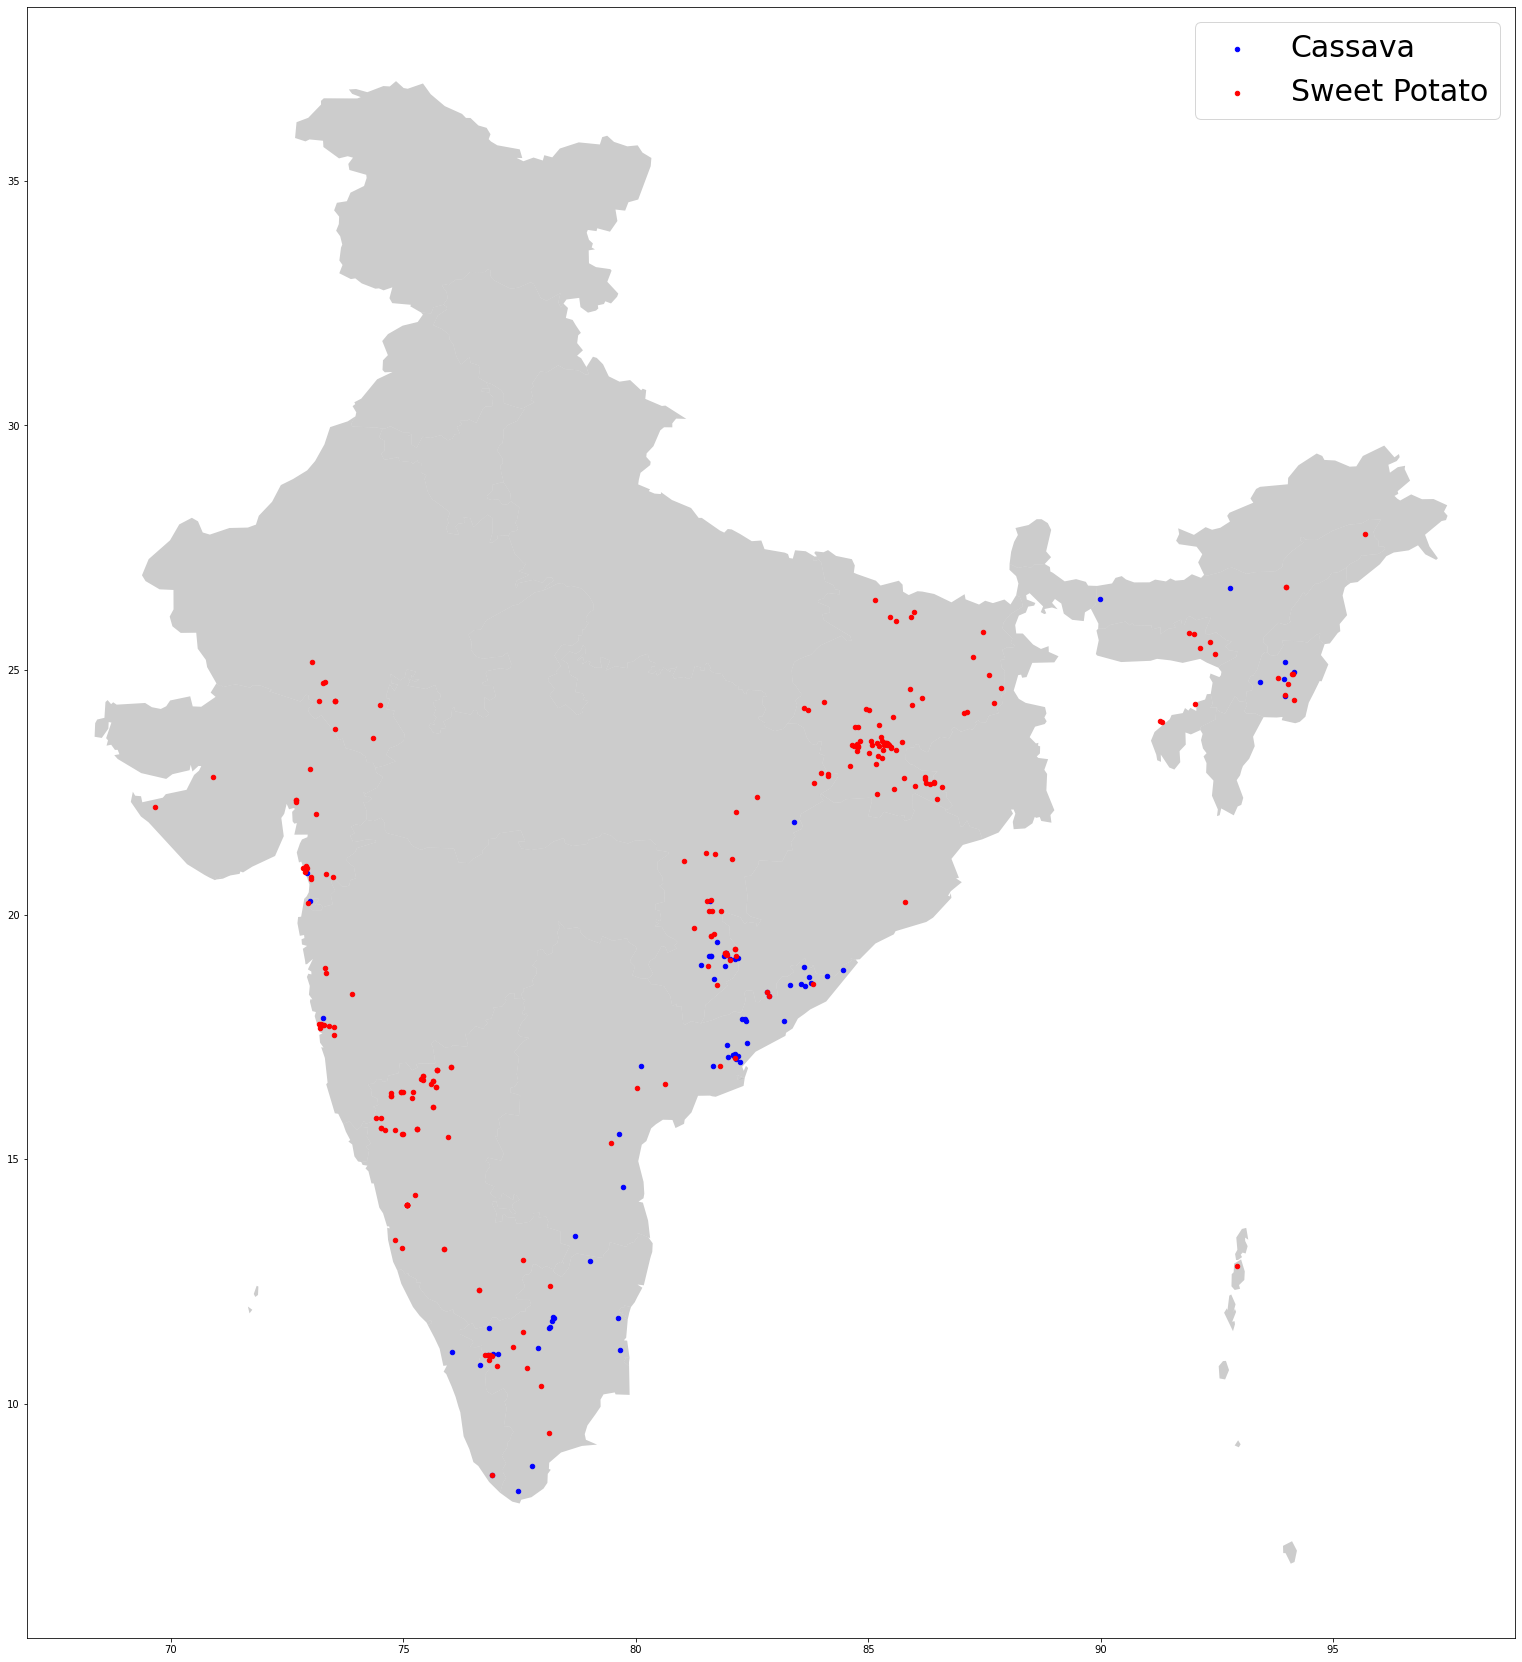

In [180]:
fig,ax = plt.subplots(figsize = (30,30))
india_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df[geo_df['Crop_id'] == 1].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Cassava")
geo_df[geo_df['Crop_id'] == 2].plot(ax = ax, markersize = 20, color = "red", marker = "o", label = "Sweet Potato")
plt.legend(prop={'size': 30})